# Charity Care in the State of Texas (2017 - 2022)

### Variables found in Dataset 

**County**: Name of county in Texas

**Facility**: Name of charity care facility 

**Total Bad Debt Charges**: [Bad credit](https://healthdata.dshs.texas.gov/dashboard/hospitals/texas-hospital-data#data-source) is defined as "the notice of actual or expected uncollected payments based on delays of credit." . This variable is a sum of the bad credit accumulated by patients at a certain clinic. 

**Total Charity Care Charges**: Total value of services provided for free or at a reduced cost to patients 

**Total Gross Patient Revenue**: Full amount of money that the clinic would bill based on the services provided to a patient 

**Total Net Patient Revenue**: Final amount of money that the clinic actually bills patients after accounting for waived fees, reduced costs, and other price cutting measures.  

**Total Uncompensated Care**: A total dollar amount of the value of care given by the clinic that was resulted into no net profit for the clinic 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Charity_Table.csv', delimiter= '\t', encoding='utf-16')
data.head()

,Region,County,Facility,Total Bad Debt Charges,Total Charity Care Charges,Total Gross Patient Revenue,Total Net Patient Revenue,Total Uncompensated Care
0,1,BAILEY,Muleshoe Area Medical Center,"$3,741,556","$6,782,190","$72,210,799","$44,319,108","$10,523,746"
1,1,CASTRO,Plains Memorial Hospital,"$6,078,495","$7,224,640","$72,629,074","$59,725,027","$13,303,135"
2,1,CHILDRESS,Childress Regional Medical Center,"$12,604,934","$19,030,755","$421,125,820","$171,780,463","$31,635,689"
3,1,COCHRAN,Cochran Memorial Hospital,"$508,816","$218,880","$6,365,837","$11,031,997","$727,696"
4,1,COLLINGSWORTH,Collingsworth General Hospital,"$1,225,551","$2,224,104","$34,324,929","$37,383,085","$3,449,655"


In [4]:
#obtain column names
data.columns

Index(['Region ', 'County', 'Facility', 'Total Bad Debt Charges',
       'Total Charity Care Charges', 'Total Gross Patient Revenue',
       'Total Net Patient Revenue', 'Total Uncompensated Care'],
      dtype='object')

## Cleaning the data

In [5]:
#choose the columns that contain dollar amounts 
columns = ['Total Bad Debt Charges',
       'Total Charity Care Charges', 'Total Gross Patient Revenue',
       'Total Net Patient Revenue', 'Total Uncompensated Care']

#remove all parentheses, dollar signs, and commas
for col in columns:
    data[col] = data[col].astype(str)
    data[col] = data[col].replace(r'[\(\)$,]', '', regex=True)
    data[col] = data[col].astype(float)

In [6]:
#Check for duplicate rows 
data[data.duplicated]

,Region,County,Facility,Total Bad Debt Charges,Total Charity Care Charges,Total Gross Patient Revenue,Total Net Patient Revenue,Total Uncompensated Care


In [7]:
#rename 'Region ' into 'Region'
data = data.rename(columns= {'Region ':'Region'})

## Plots

Total Uncompensated Care per Region (fig. 1)
___

Text(0, 0.5, 'Total Uncompensated Care (tens of billions)')

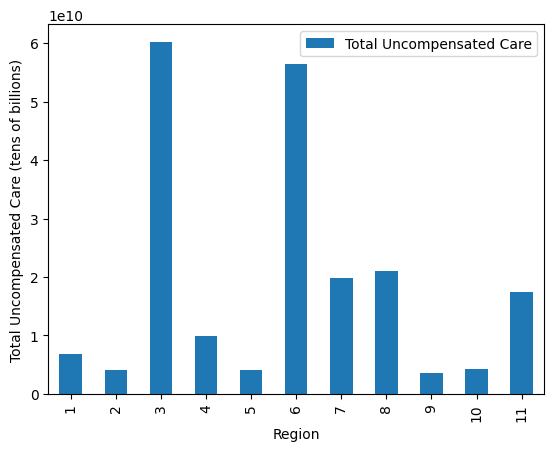

In [8]:
agg_region_data = data.groupby('Region')['Total Uncompensated Care'].sum().reset_index()
agg_region_data.plot(x='Region', y='Total Uncompensated Care', kind='bar')
plt.ylabel('Total Uncompensated Care (tens of billions)')

Total Uncompensated Care per County (fig. 2)
___________________________________

Text(0, 0.5, 'Total Uncompensated Care (tens of billions)')

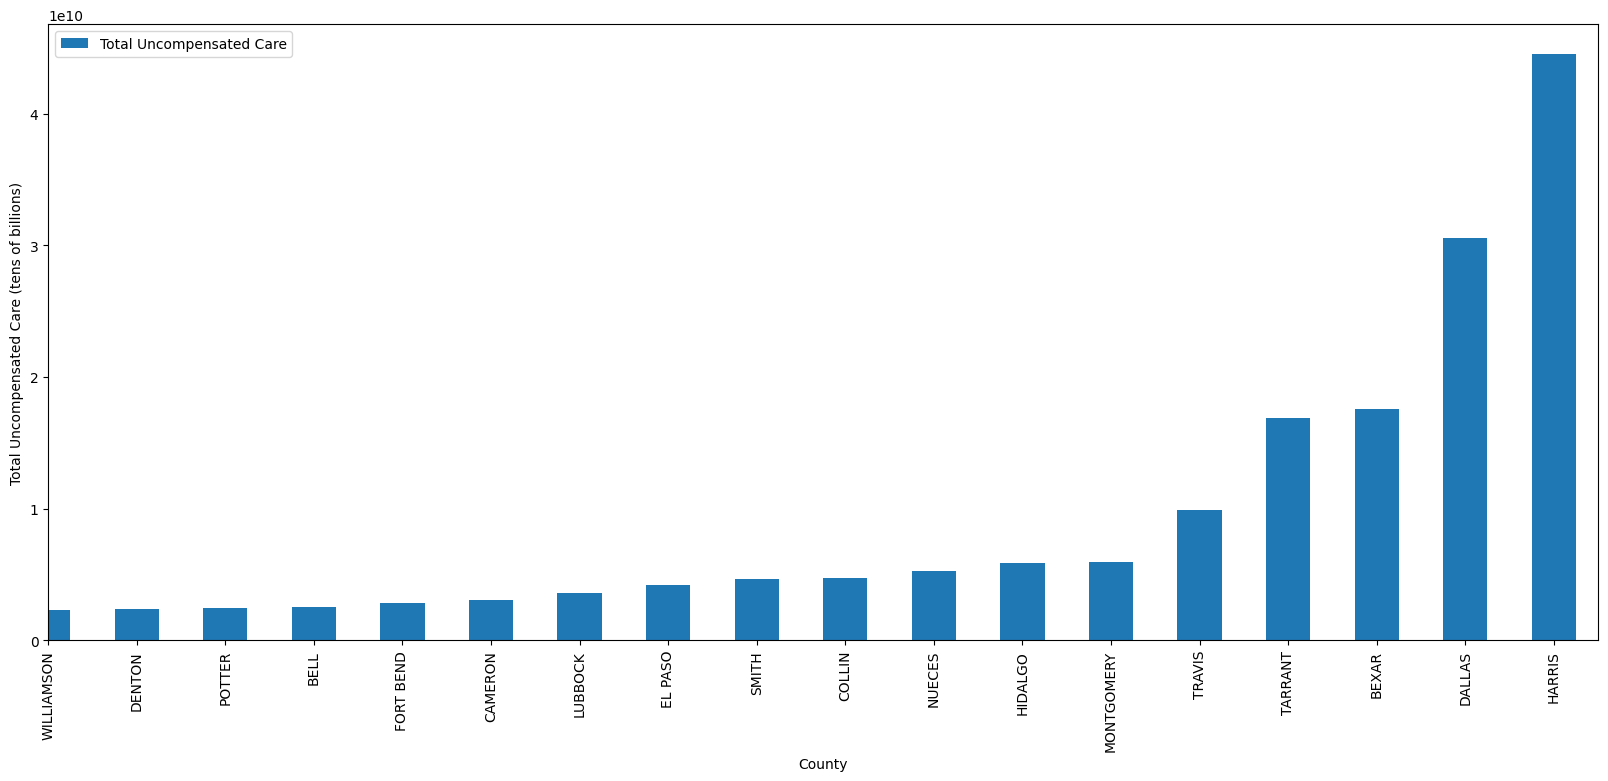

In [9]:
agg_county_data = data.groupby('County')['Total Uncompensated Care'].sum().reset_index().sort_values(by= 'Total Uncompensated Care')
agg_county_data.plot(x = 'County', y = 'Total Uncompensated Care', kind= 'bar', figsize=(20,8))
plt.xlim(left = 165)
plt.ylabel("Total Uncompensated Care (tens of billions)")

Harris, Dallas, Bexar, Tarrant, Travis, Montgomery, and Hidalgo counties had charity clinics that spent the most on uncompensated care. 

Total Uncompensated Care per County (fig. 3)
___

Text(0, 0.5, 'Total Uncompensated Care (tens of billions)')

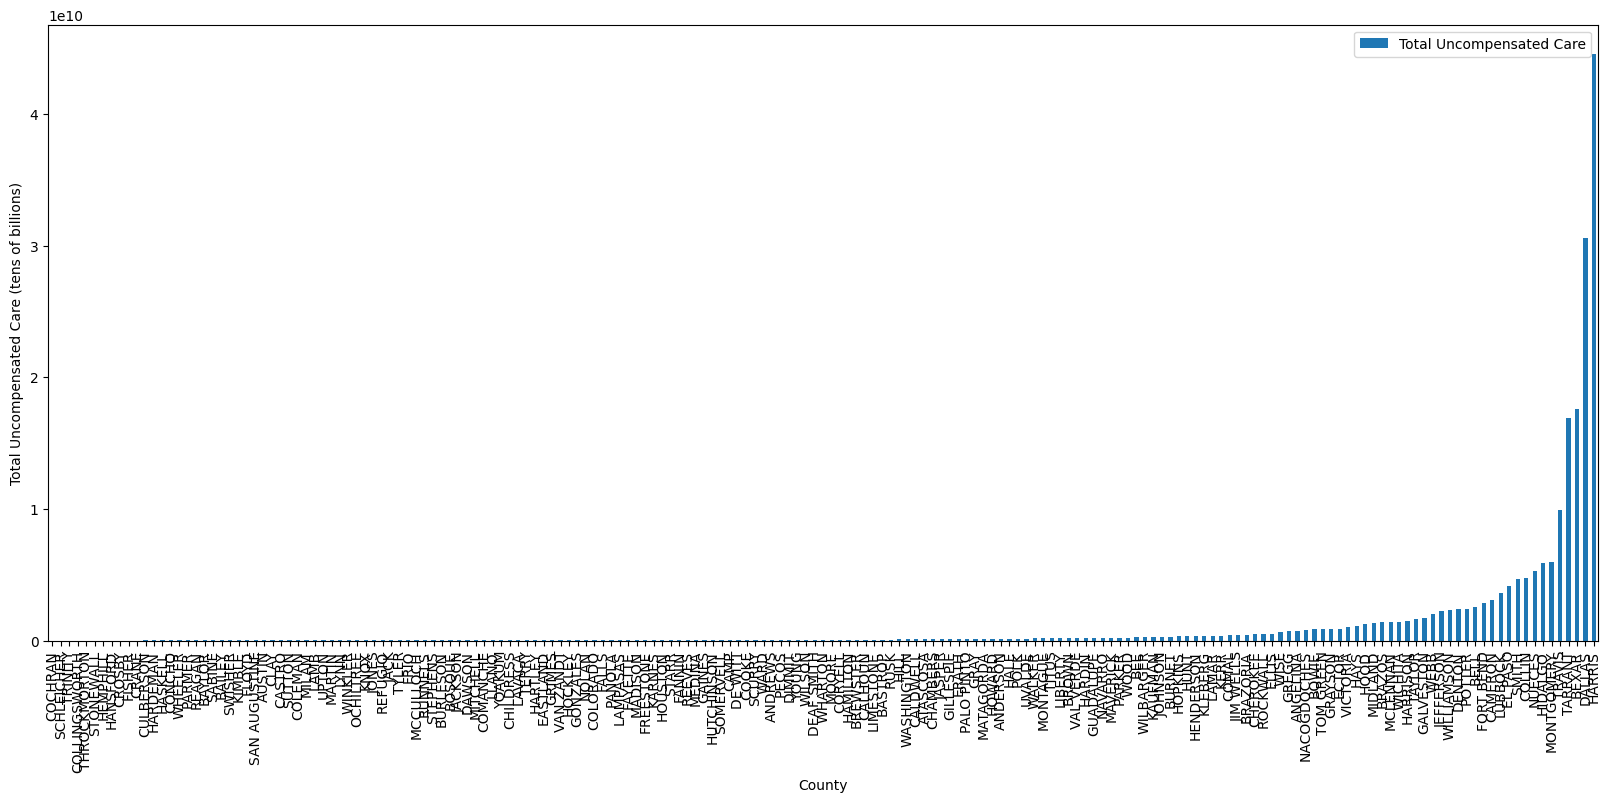

In [10]:
agg_county_data.plot(x = 'County', y = 'Total Uncompensated Care', kind= 'bar', figsize=(20,8))
plt.ylabel("Total Uncompensated Care (tens of billions)")

This is the full graph, showing the immense disparity between the highest and lowest counties.

In [11]:
agg_county_data[agg_county_data['Total Uncompensated Care'] <= 10000000] #10,000,000

,County,Total Uncompensated Care
28,COCHRAN,727696.0
145,SCHLEICHER,2322904.0
161,TRINITY,2437105.0
31,COLLINGSWORTH,3449655.0
157,THROCKMORTON,3611314.0
151,STONEWALL,4866593.0
79,HEMPHILL,5281343.0
71,HANSFORD,5509799.0
39,CROSBY,5615793.0
55,FISHER,6769958.0


Spatial Map
___

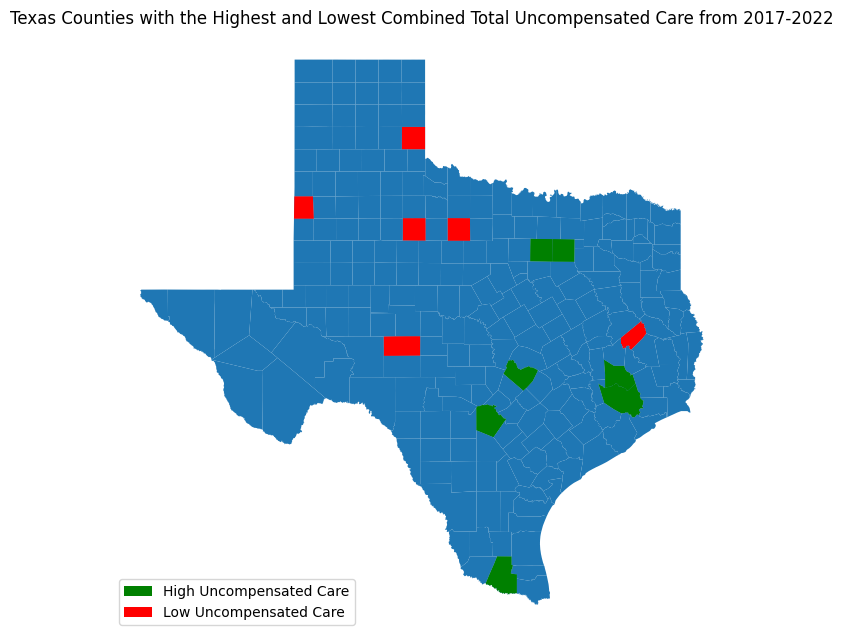

In [12]:
import geopandas as gpd
from matplotlib.patches import Patch

counties = gpd.read_file('tl_2024_us_county.zip') #shapefile 
texas_counties = counties[counties['STATEFP'] == '48']
input = ['Harris', 'Dallas', 'Bexar', 'Tarrant', 'Travis', 'Montgomery', 'Hidalgo']
low_input = ['Cochran', 'Schleicher', 'Trinity', 'Collingsworth', 'Throckmorton', 'Stonewall']
selected_counties = texas_counties[texas_counties['NAME'].isin(input)]
low_selected_counties = texas_counties[texas_counties['NAME'].isin(low_input)]

fig, ax = plt.subplots(figsize=(8, 8))
texas_counties.plot(ax=ax)
#ax = texas_counties.plot()
selected_counties.plot(ax=ax, color='green')
low_selected_counties.plot(ax=ax, color = 'red')

legend_elements = [
    Patch(facecolor='green', label='High Uncompensated Care'),
    Patch(facecolor='red', label='Low Uncompensated Care')
]

ax.legend(handles=legend_elements, loc='lower left')

plt.title('Texas Counties with the Highest and Lowest Combined Total Uncompensated Care from 2017-2022')
plt.axis('off')
plt.show()
